In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # "Times", "Palatino", "New Century Schoolbook", "Bookman", 
    })
import seaborn as sn
from  matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
my_cmap_r=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256) 
import matplotlib.ticker as ticker

# Two Gaussians

In [45]:
x1 = np.random.normal(size=(50, 2)) + 1
x2 = np.random.normal(size=(51, 2))  - 1

mean1 = np.mean(x1, axis = 0)
mean2 = np.mean(x2, axis = 0)

y1 = np.ones(50)
y2 = np.ones(51)

In [46]:
center_x, center_y = (mean1+mean2)/2
center_x, center_y

(0.030098929830481014, -0.005924023124143807)

In [47]:
xc1, yc1 = mean1
xc2, yc2 = mean2

In [48]:
m = (yc2 - yc1)/(xc2 - xc1)
m = -1/m

In [49]:
def decision_boundary(x):
    
    return center_y + m*(x - center_x)

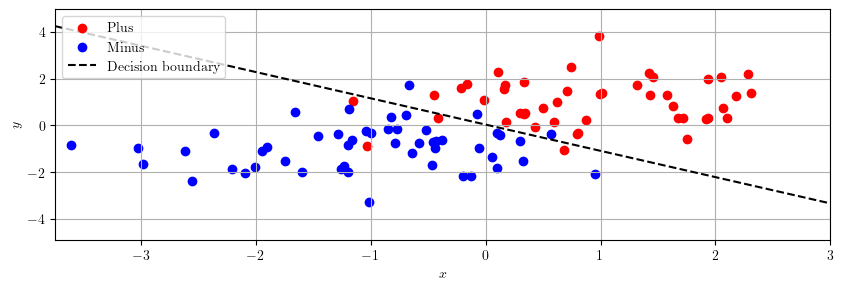

In [50]:
plt.figure(figsize = (10,3))

plt.scatter(x1[:, 0], x1[:, 1], marker = 'o', color="red", label = "Plus")
plt.scatter(x2[:, 0], x2[:, 1], marker = 'o', color="blue", label = "Minus")
x_vals = np.arange(-4, 4, 0.0001)
y_vals = decision_boundary(x_vals)
plt.plot(x_vals, y_vals, '--', color = "black", label = "Decision boundary")
# plt.axhline(0, color="black")
# plt.axvline(0, color="black")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc="upper left")
plt.xlim(-3.75,3)
plt.grid()
# plt.savefig("Plots/ex1_two_gaussians.pdf", bbox_inches="tight")
plt.show()

# LS-SVM hyperparameters

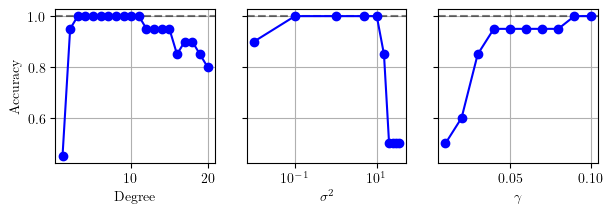

In [51]:
deg = [i+1 for i in range(20)]
accuracies_deg = [0.4500,  0.9500, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9500, 0.9500, 0.9500, 0.9500, 0.8500, 0.9000, 0.9000, 0.8500, 0.8000]
sig = [0.0100, 0.1000, 1.0000, 5.0000, 10.0000, 15.0000, 20.0000, 25.0000, 30.0000, 35.0000]
accuracies_sig = [0.9000, 1.0000, 1.0000, 1.0000, 1.0000, 0.8500, 0.5000, 0.5000, 0.5000, 0.5000]
gam = [0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800, 0.0900, 0.1000]
accuracies_gam = [0.5000,  0.6000, 0.8500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 1.0000, 1.0000]

plt.subplots(nrows=1, ncols=3, figsize=(7,2), sharey=True)

plt.subplot(131)

plt.plot(deg, accuracies_deg, '-o', color="blue", zorder=100)
plt.grid()
plt.xlabel(r"Degree")
plt.ylabel(r"Accuracy")
plt.axhline(1, ls = "--", color="black", alpha = 0.5)

plt.subplot(132)

plt.plot(sig, accuracies_sig, '-o', color="blue", zorder=100)
plt.grid()
plt.xlabel(r"$\sigma^2$")
plt.xscale('log')
# plt.ylabel("Accuracy")
plt.axhline(1, ls = "--", color="black", alpha = 0.5)

plt.subplot(133)

plt.plot(gam, accuracies_gam, '-o', color="blue", zorder=100)
plt.grid()
plt.xlabel(r"$\gamma$")
# plt.ylabel("Accuracy")
plt.axhline(1, ls = "--", color="black", alpha = 0.5)

plt.savefig("Plots/ex1_ls_svm_hyperparams.pdf", bbox_inches='tight')
plt.show()

# Hyperparameter tuning with validation sets

In [52]:
index = np.array([1e-3, 1e-2, 1e-1, 1e+0, 1e+1, 1e+2, 1e+3])
columns = np.array([1e-3, 1e-2, 1e-1, 1e+0, 1e+1, 1e+2, 1e+3])

In [53]:
rs = pd.read_csv("Data/ex1_tuning_randomsplit.csv",header=None)
cv = pd.read_csv("Data/ex1_tuning_crossvalidation.csv",header=None)
loo = pd.read_csv("Data/ex1_tuning_leavoneout.csv",header=None)

In [54]:
for df in [rs, cv, loo]:
    df.set_index(index, inplace = True)
    df.columns = columns
rs

,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
0.001,0.2,0.35,0.30,0.45,0.25,0.25,0.25
0.010,0.3,0.45,0.25,0.40,0.20,0.35,0.30
0.100,0.0,0.05,0.05,0.05,0.00,0.00,0.10
1.000,0.0,0.00,0.10,0.00,0.05,0.00,0.10
10.000,0.0,0.05,0.05,0.00,0.10,0.15,0.00
100.000,0.0,0.05,0.05,0.00,0.05,0.05,0.05
1000.000,0.3,0.50,0.30,0.45,0.40,0.30,0.40


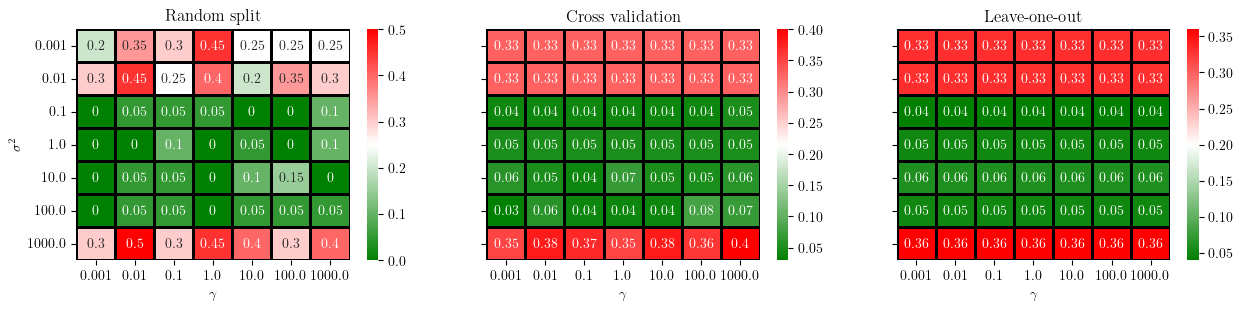

In [55]:
plt.subplots(nrows=1, ncols=3, figsize=(15,3), sharey=True)

plt.subplot(131)

sn.heatmap(rs, annot=True, cmap=my_cmap_r, linewidths=1, linecolor='black')
plt.title("Random split")
plt.xlabel(r"$\gamma$")
plt.ylabel(r"$\sigma^2$")
# plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.subplot(132)

sn.heatmap(cv, annot=True, cmap=my_cmap_r, linewidths=1, linecolor='black')
plt.xlabel(r"$\gamma$")
plt.title("Cross validation")

plt.subplot(133)

sn.heatmap(loo, annot=True, cmap=my_cmap_r, linewidths=1, linecolor='black')
plt.xlabel(r"$\gamma$")
plt.title("Leave-one-out")

plt.savefig("Plots/ex1_tuning_algorithms.pdf", bbox_inches='tight')
plt.show()

# Tunelssvm results

In [56]:
results = pd.read_csv("Data/tunelssvm_results.csv")
gridsearch = results[results["Algorithm"] == "gridsearch"]
simplex = results[results["Algorithm"] == "simplex"]
gridsearch

,Algorithm,Gam,Sig2,Cost
0,gridsearch,0.793739,0.102147,0.04
1,gridsearch,0.331809,0.018472,0.03
2,gridsearch,61.626118,0.114860,0.04
3,gridsearch,1332.757803,0.098354,0.02
4,gridsearch,738218.292922,82.452681,0.03
...,...,...,...,...
95,gridsearch,0.362469,0.343123,0.04
96,gridsearch,48.507237,0.147669,0.04
97,gridsearch,5590.159460,736.536502,0.03
98,gridsearch,814.702082,0.225010,0.03


In [57]:
fs=16

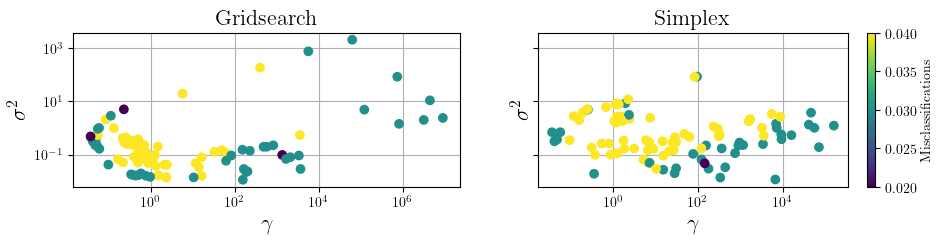

In [58]:
plt.subplots(nrows = 1, ncols = 2, figsize=(11,2), sharey=True)

df_list = [gridsearch, simplex]
title_list = ["Gridsearch", "Simplex"]

for i, df in enumerate(df_list):
    plt.subplot(1,2,i+1)
    gam_values = df["Gam"].values
    sig2_values = df["Sig2"].values
    mse_values = df["Cost"].values
    plt.scatter(gam_values, sig2_values, c = mse_values, zorder=100)
    plt.title(title_list[i], fontsize=fs)
    plt.xlabel(r"$\gamma$", fontsize=fs)
    plt.ylabel(r"$\sigma^2$", fontsize=fs)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    
cbar = plt.colorbar()
cbar.set_label("Misclassifications")

plt.savefig("Plots/tunelssvm_results.pdf", bbox_inches = 'tight')
plt.show()

# Ripley dataset

In [59]:
from sklearn.manifold import TSNE

In [60]:
from scipy.io import loadmat

In [61]:
f_title = 16

In [62]:
ripley = loadmat("Data/ripley.mat")
Xtrain, Xtest, Ytrain, Ytest = ripley["Xtrain"], ripley["Xtest"], ripley["Ytrain"], ripley["Ytest"]
print(f"{100 * np.sum(np.where(Ytrain.flatten() == 1, 1, 0))/len(Ytrain)} % positive")

50.0 % positive


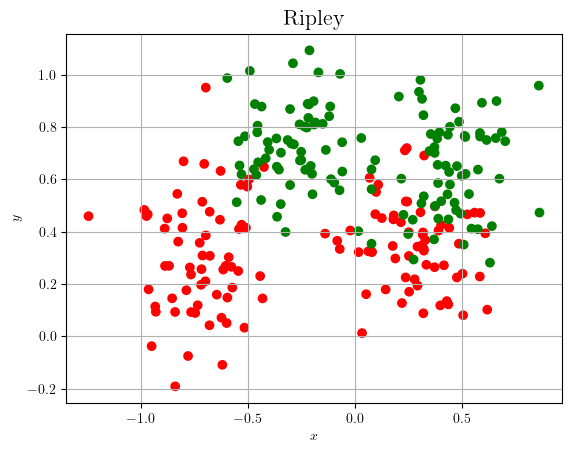

In [63]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c = Ytrain, cmap = my_cmap)
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Ripley", fontsize = f_title)
plt.savefig("Plots/ex1_ripley.pdf", bbox_inches = 'tight')
plt.show()

t-SNE plot:

In [64]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(Xtrain)

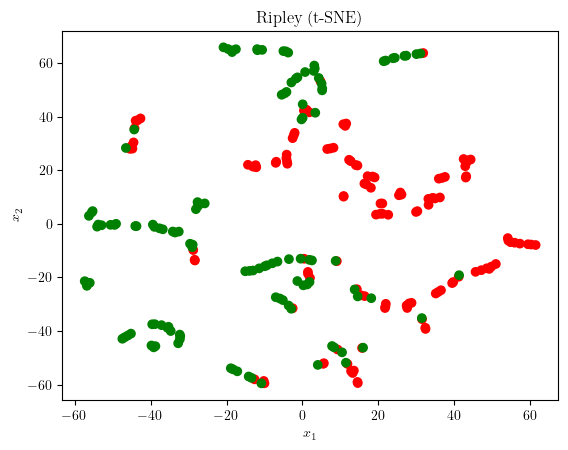

In [65]:
colors = ["red", "green"]
color_vec = []
for label in Ytrain:
    if label[0] == -1:
        color_vec.append("red")
    else:
        color_vec.append("green")
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color_vec)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Ripley (t-SNE)")
plt.savefig("Plots/ripley_tsne.pdf", bbox_inches='tight')
plt.show()

# Breast dataset

In [66]:
breast = loadmat("Data/breast.mat")
Xtrain, Xtest, Ytrain, Ytest = breast["trainset"], breast["testset"], breast["labels_train"], breast["labels_test"]
print(f"{100 * np.sum(np.where(Ytrain.flatten() == 1, 1, 0))/len(Ytrain)} % positive")
print(f"{100 * np.sum(np.where(Ytrain.flatten() == -1, 1, 0))/len(Ytrain)} % negative")

37.5 % positive
62.5 % negative


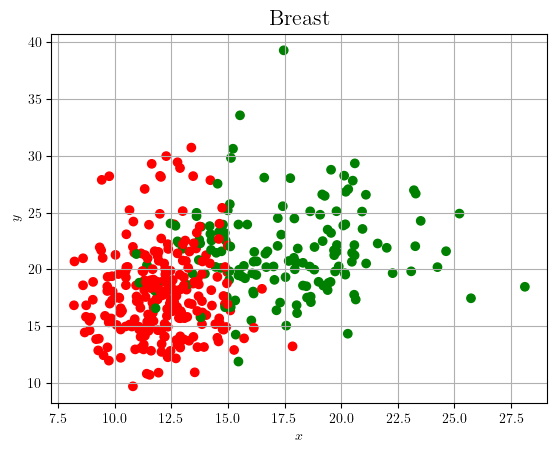

In [67]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c = Ytrain, cmap = my_cmap)
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Breast", fontsize = f_title)
plt.savefig("Plots/ex1_breast.pdf", bbox_inches = 'tight')
plt.show()

t-SNE plot:

In [68]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(Xtrain)

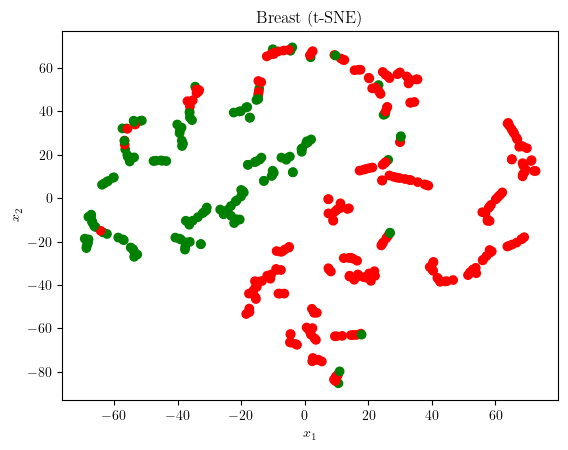

In [69]:
colors = ["red", "green"]
color_vec = []
for label in Ytrain:
    if label[0] == -1:
        color_vec.append("red")
    else:
        color_vec.append("green")
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color_vec)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Breast (t-SNE)")
plt.savefig("Plots/breast_tsne.pdf", bbox_inches='tight')
plt.show()

# Diabetes

In [70]:
diabetes = loadmat("Data/diabetes.mat")
Xtrain, Xtest, Ytrain, Ytest = diabetes["trainset"], diabetes["testset"], diabetes["labels_train"], diabetes["labels_test"]
print(f"{100 * np.sum(np.where(Ytrain.flatten() == 1, 1, 0))/len(Ytrain)} % positive")
print(f"{100 * np.sum(np.where(Ytrain.flatten() == -1, 1, 0))/len(Ytrain)} % negative")

31.666666666666668 % positive
68.33333333333333 % negative


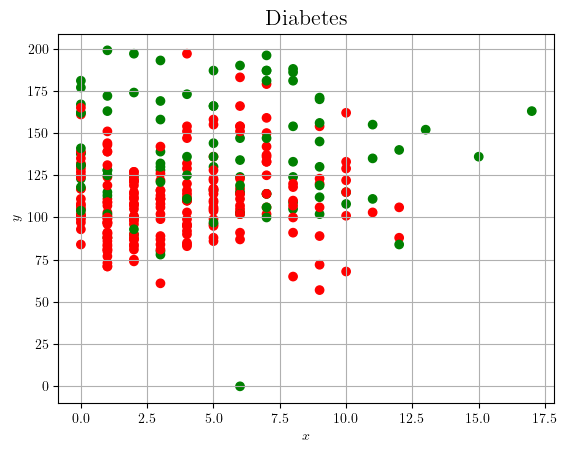

In [71]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c = Ytrain, cmap = my_cmap)
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Diabetes", fontsize = f_title)
plt.savefig("Plots/ex1_diabetes.pdf", bbox_inches = 'tight')
plt.show()

t-SNE plot:

In [72]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(Xtrain)

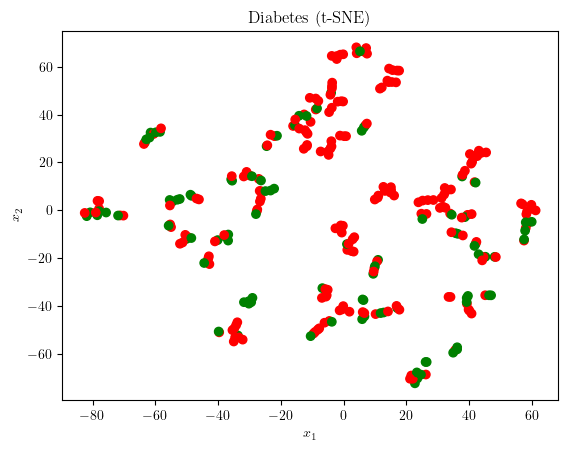

In [73]:
colors = ["red", "green"]
color_vec = []
for label in Ytrain:
    if label[0] == -1:
        color_vec.append("red")
    else:
        color_vec.append("green")
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color_vec)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Diabetes (t-SNE)")
plt.savefig("Plots/diabetes_tsne.pdf", bbox_inches='tight')
plt.show()